In [1]:
import os 
import numpy as np
import pandas as pd
import anndata
import scanpy as sc
import matplotlib.pyplot as plt
import scgen
import seaborn as sns
from scipy import stats
import matplotlib
import scipy.sparse as sparse
font = {'family' : 'Arial',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)

Using TensorFlow backend.


In [2]:
path_to_save = "../results/Figures/Figure 2/"
os.makedirs(path_to_save, exist_ok=True)
sc.settings.figdir = path_to_save

## Read PBMC Dataset

In [3]:
pbmc = sc.read("../data/train_pbmc.h5ad")
pbmc.obs["cell_type"].replace("CD4T", "CD4-T", inplace=True)
pbmc.obs["cell_type"].replace("CD8T", "CD8-T", inplace=True)
pbmc.obs["cell_type"].replace("Dendritic", "DC", inplace=True)
pbmc.obs["cell_type"].replace("FCGR3A+Mono", "F-Mono", inplace=True)
pbmc.obs["cell_type"].replace("CD14+Mono", "CD14-Mono", inplace=True)
pbmc

AnnData object with n_obs × n_vars = 16893 × 6998 
    obs: 'condition', 'n_counts', 'n_genes', 'mt_frac', 'cell_type'
    var: 'gene_symbol', 'n_cells'
    uns: 'cell_type_colors', 'condition_colors', 'neighbors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

In [4]:
cd4t = pbmc[pbmc.obs["cell_type"] == "CD4-T"]
cd4t

View of AnnData object with n_obs × n_vars = 5564 × 6998 
    obs: 'condition', 'n_counts', 'n_genes', 'mt_frac', 'cell_type'
    var: 'gene_symbol', 'n_cells'
    uns: 'cell_type_colors', 'condition_colors', 'neighbors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

### Figure 2.a

... storing 'cell_type' as categorical


saving figure to file ../results/Figures/Figure 2/umap_conditions.pdf


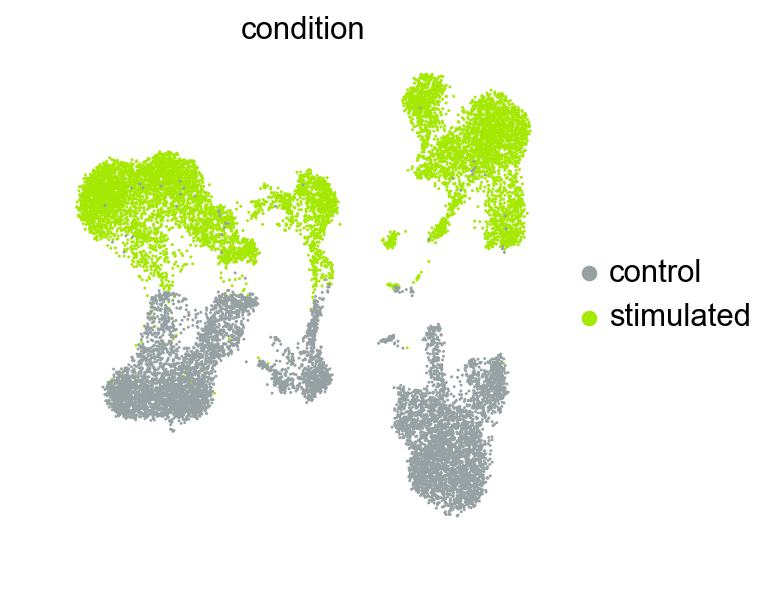

In [5]:
sc.set_figure_params(fontsize=14)
sc.pp.neighbors(pbmc)
sc.tl.umap(pbmc)
sc.pl.umap(pbmc, color=["condition"],
           legend_fontsize=14,
           palette=["#96a1a3", "#A4E804"],
           save=f"_conditions.pdf",
           show=True, 
           frameon=False)
os.rename(src=os.path.join(path_to_save, "umap_conditions.pdf"), 
          dst=os.path.join(path_to_save, "Fig2a_umap_conditions.pdf"))

saving figure to file ../results/Figures/Figure 2/umap_celltypes.pdf


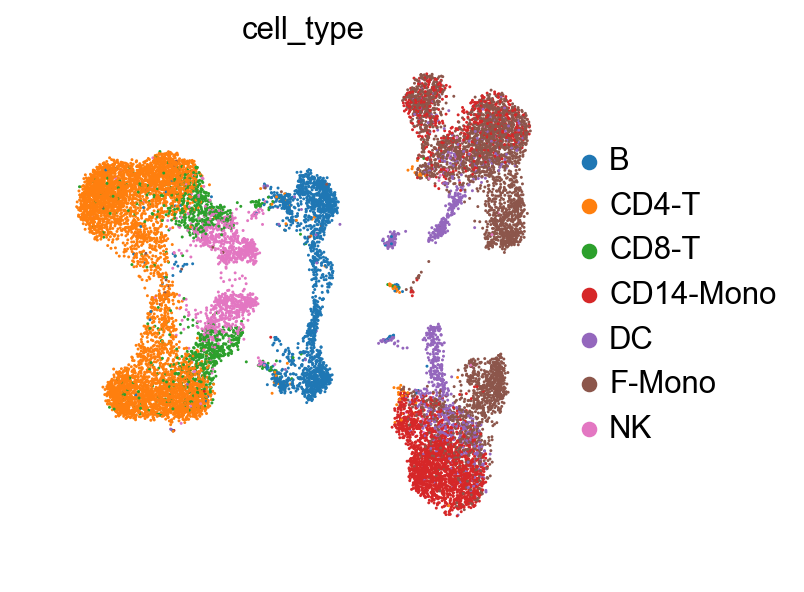

In [6]:
sc.pp.neighbors(pbmc)
sc.tl.umap(pbmc)
sc.pl.umap(pbmc, color=["cell_type"],
           legend_fontsize=14,
           save=f"_celltypes.pdf",
           show=True,
           frameon=False)
os.rename(src=os.path.join(path_to_save, "umap_celltypes.pdf"), 
          dst=os.path.join(path_to_save, "Fig2a_umap_celltypes.pdf"))

### Figure 2.b

In [7]:
pbmc_reconstructed = sc.read("../data/reconstructed/scGen/pbmc.h5ad")
pbmc_reconstructed

AnnData object with n_obs × n_vars = 24900 × 6998 
    obs: 'batch', 'cell_type', 'condition'

In [9]:
network = scgen.VAEArith(z_dimension=100, 
                         x_dimension=pbmc.shape[1],
                         model_path="../models/scGen/pbmc/CD4T/models/scgen")
network.restore_model()

INFO:tensorflow:Restoring parameters from ../models/scGen/pbmc/CD4T/models/scgen


In [10]:
conditions = {"ctrl": "CD4T_ctrl", "pred_stim": "CD4T_pred_stim", "real_stim": "CD4T_real_stim"}
cd4t_reconstructed = pbmc_reconstructed[pbmc_reconstructed.obs["condition"].isin(conditions.values())]
cd4t_reconstructed

View of AnnData object with n_obs × n_vars = 8001 × 6998 
    obs: 'batch', 'cell_type', 'condition'

In [11]:
sc.tl.rank_genes_groups(pbmc, groupby="condition", n_genes=100, method="wilcoxon")
diff_genes = pbmc.uns["rank_genes_groups"]["names"]["stimulated"]

In [12]:
def replace_conditions(adata):
    adata.obs["condition"].replace("CD4T_ctrl", "CD4-T_ctrl", inplace=True)
    adata.obs["condition"].replace("CD4T_real_stim", "CD4-T_real_stim", inplace=True)
    adata.obs["condition"].replace("CD4T_pred_stim", "CD4-T_pred_stim", inplace=True)

    adata.obs["condition"].replace("CD8T_ctrl", "CD8-T_ctrl", inplace=True)
    adata.obs["condition"].replace("CD8T_real_stim", "CD8-T_real_stim", inplace=True)
    adata.obs["condition"].replace("CD8T_pred_stim", "CD8-T_pred_stim", inplace=True)

    adata.obs["condition"].replace("Dendritic_ctrl", "DC_ctrl", inplace=True)
    adata.obs["condition"].replace("Dendritic_real_stim", "DC_real_stim", inplace=True)
    adata.obs["condition"].replace("Dendritic_pred_stim", "DC_pred_stim", inplace=True)

    adata.obs["condition"].replace("FCGR3A+Mono_ctrl", "F-Mono_ctrl", inplace=True)
    adata.obs["condition"].replace("FCGR3A+Mono_real_stim", "F-Mono_real_stim", inplace=True)
    adata.obs["condition"].replace("FCGR3A+Mono_pred_stim", "F-Mono_pred_stim", inplace=True)

    adata.obs["condition"].replace("CD14+Mono_ctrl", "CD14-Mono_ctrl", inplace=True)
    adata.obs["condition"].replace("CD14+Mono_real_stim", "CD14-Mono_real_stim", inplace=True)
    adata.obs["condition"].replace("CD14+Mono_pred_stim", "CD14-Mono_pred_stim", inplace=True)
def replace_cell_types(adata):
    adata.obs["cell_type"].replace("CD4T", "CD4-T", inplace=True)
    adata.obs["cell_type"].replace("CD8T", "CD8-T", inplace=True)
    adata.obs["cell_type"].replace("Dendritic", "DC", inplace=True)
    adata.obs["cell_type"].replace("FCGR3A+Mono", "F-Mono", inplace=True)
    adata.obs["cell_type"].replace("CD14+Mono", "CD14-Mono", inplace=True)

In [13]:
conditions = {"ctrl": "CD4-T_ctrl", "pred_stim": "CD4-T_pred_stim", "real_stim": "CD4-T_real_stim"}

In [14]:
replace_conditions(pbmc_reconstructed)
replace_conditions(cd4t_reconstructed)

0.9820697582619972
0.9775258339253587


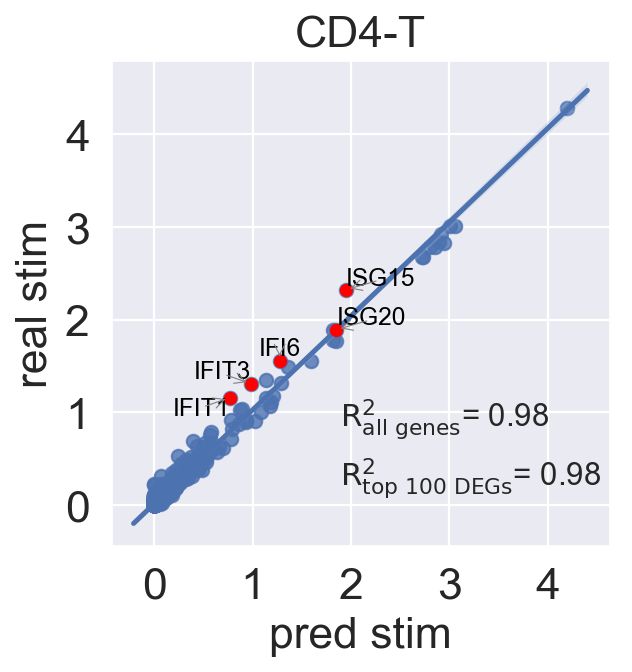

In [14]:
sns.set()
scgen.plotting.reg_mean_plot(cd4t_reconstructed, 
                             condition_key="condition",
                             axis_keys={"x": conditions["pred_stim"], "y": conditions["real_stim"]},
                             gene_list=diff_genes[:5],
                             top_100_genes=diff_genes,
                             path_to_save=os.path.join(path_to_save, f"Fig2b_reg_mean.pdf"),
                             legend=False,
                             labels={"x": "pred stim", "y":"real stim"},
                             show=True,
                             fontsize=20,
                             textsize=14,
                             title="CD4-T",
                             x_coeff=0.55, 
                             range=[0, 5, 1])

### Fig 2.d

In [15]:
def calc_R2(adata, n_genes=6998, conditions=None):
    if n_genes != adata.shape[1]:
        sc.tl.rank_genes_groups(adata, groupby="condition", n_genes=n_genes, method="wilcoxon")
        diff_genes = adata.uns["rank_genes_groups"]["names"][conditions["real_stim"]]
        adata = adata[:, diff_genes.tolist()]
    r_values = np.zeros((1, 100))
    real_stim = adata[adata.obs["condition"] == conditions["real_stim"]]
    pred_stim = adata[adata.obs["condition"] == conditions["pred_stim"]]
    for i in range(100):
        pred_stim_idx = np.random.choice(range(0, pred_stim.shape[0]), int(0.8 * pred_stim.shape[0]))
        real_stim_idx = np.random.choice(range(0, real_stim.shape[0]), int(0.8 * real_stim.shape[0]))
        if sparse.issparse(pred_stim.X):
            pred_stim.X = pred_stim.X.A
            real_stim.X = real_stim.X.A
        x = np.average(pred_stim.X[pred_stim_idx], axis=0)
        y = np.average(real_stim.X[real_stim_idx], axis=0)
        m, b, r_value, p_value, std_err = stats.linregress(x, y)
        r_values[0, i] = r_value ** 2
    return r_values.mean(), r_values.std()

In [16]:
def calc_R2_mean_var(adata, cell_types, n_genes):
    r2_means, r2_vars = [], []
    for cell_type in cell_types:
        conditions = {"real_stim": cell_type+"_real_stim", "pred_stim": cell_type+"_pred_stim"}
        r2_mean, r2_var = calc_R2(adata, n_genes=n_genes, conditions=conditions)
        r2_means.append(r2_mean)
        r2_vars.append(r2_var)
    return r2_means, r2_vars

In [17]:
def calc_R2_specific_model(adata, n_genes, conditions):
    if n_genes != adata.shape[1]:
        sc.tl.rank_genes_groups(adata, groupby="condition", n_genes=n_genes, method="wilcoxon")
        diff_genes = adata.uns["rank_genes_groups"]["names"][conditions["real_stim"]]
        adata = adata[:, diff_genes.tolist()]
    r2_means, r2_vars = [], []
    r_values = np.zeros((1, 100))
    real_stim = adata[adata.obs["condition"] == conditions["real_stim"]]
    pred_stim = adata[adata.obs["condition"] == conditions["pred_stim"]]
    for i in range(100):
        pred_stim_idx = np.random.choice(range(0, pred_stim.shape[0]), int(0.8 * pred_stim.shape[0]))
        real_stim_idx = np.random.choice(range(0, real_stim.shape[0]), int(0.8 * real_stim.shape[0]))
        if sparse.issparse(pred_stim.X):
            pred_stim.X = pred_stim.X.A
            real_stim.X = real_stim.X.A
        x = np.average(pred_stim.X[pred_stim_idx], axis=0)
        y = np.average(real_stim.X[real_stim_idx], axis=0)
        m, b, r_value, p_value, std_err = stats.linregress(x, y)
        r_values[0, i] = r_value ** 2
    print(r_values.mean(), r_values.std())
    return r_values.mean(), r_values.std()

In [18]:
cell_types_colnames = ["B", "CD14-Mono", "CD4-T", "CD8-T", "DC", "F-Mono", "NK"]
cell_types = ["B", "CD14-Mono", "CD4-T", "CD8-T", "DC", "F-Mono", "NK"]
r2_top100_means, r2_top100_vars = calc_R2_mean_var(pbmc_reconstructed, cell_types=cell_types_colnames, n_genes=100)
r2_all_means, r2_all_vars = calc_R2_mean_var(pbmc_reconstructed, cell_types=cell_types_colnames, n_genes=6998)

... storing 'condition' as categorical


In [19]:
all_means = np.concatenate((r2_top100_means, r2_all_means), axis=0)
all_vars = np.concatenate((r2_top100_vars, r2_all_vars), axis=0)
all_types = ["top 100 DEGs"] * 7 + ["all genes"] * 7
cell_types_x = 2 * cell_types
df = pd.DataFrame({"R^2 Means": all_means, "R^2 Stddevs": all_vars, "Type": all_types, "Cell Types": cell_types_x})
df

,R^2 Means,R^2 Stddevs,Type,Cell Types
0,0.973997,0.002196,top 100 DEGs,B
1,0.994261,0.000561,top 100 DEGs,CD14-Mono
2,0.990604,0.000523,top 100 DEGs,CD4-T
3,0.991553,0.001368,top 100 DEGs,CD8-T
4,0.986422,0.001582,top 100 DEGs,DC
5,0.993248,0.000443,top 100 DEGs,F-Mono
6,0.977904,0.001832,top 100 DEGs,NK
7,0.966267,0.001428,all genes,B
8,0.993834,0.000257,all genes,CD14-Mono
9,0.976870,0.000593,all genes,CD4-T


In [20]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2., 1.01 * height,
                '%.2f' % float(height),
                ha='center', va='bottom', fontsize=18)


In [66]:
def grouped_barplot(df, cat, subcat, val, err, filename, put_label=False, legend=False, offset=0.375):
    plt.close("all")
    import matplotlib
    matplotlib.rc('ytick', labelsize=24)
    matplotlib.rc('xtick', labelsize=29)
    plt.figure(figsize=(10, 10))
    u = df[cat].unique()
    x_pos = np.arange(0, 2*len(u), 2)
    subx = df[subcat].unique()
#     offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
#     width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        b = plt.bar(x_pos + i/1.25, dfg[val].values, capsize=10, alpha=0.95, label=f"{gr}", yerr=dfg[err].values)
        if put_label:
            autolabel(b)
#         plt.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
#     plt.xlabel(cat)
    
    plt.ylabel(r"$\mathrm{R^2}$", fontsize=25)
    plt.xticks(x_pos+offset, u, rotation=90)
    if legend:
        plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0, prop={'size': 18})
    plt.tight_layout()
    plt.savefig(os.path.join(path_to_save, filename), dpi=100)
    plt.show()

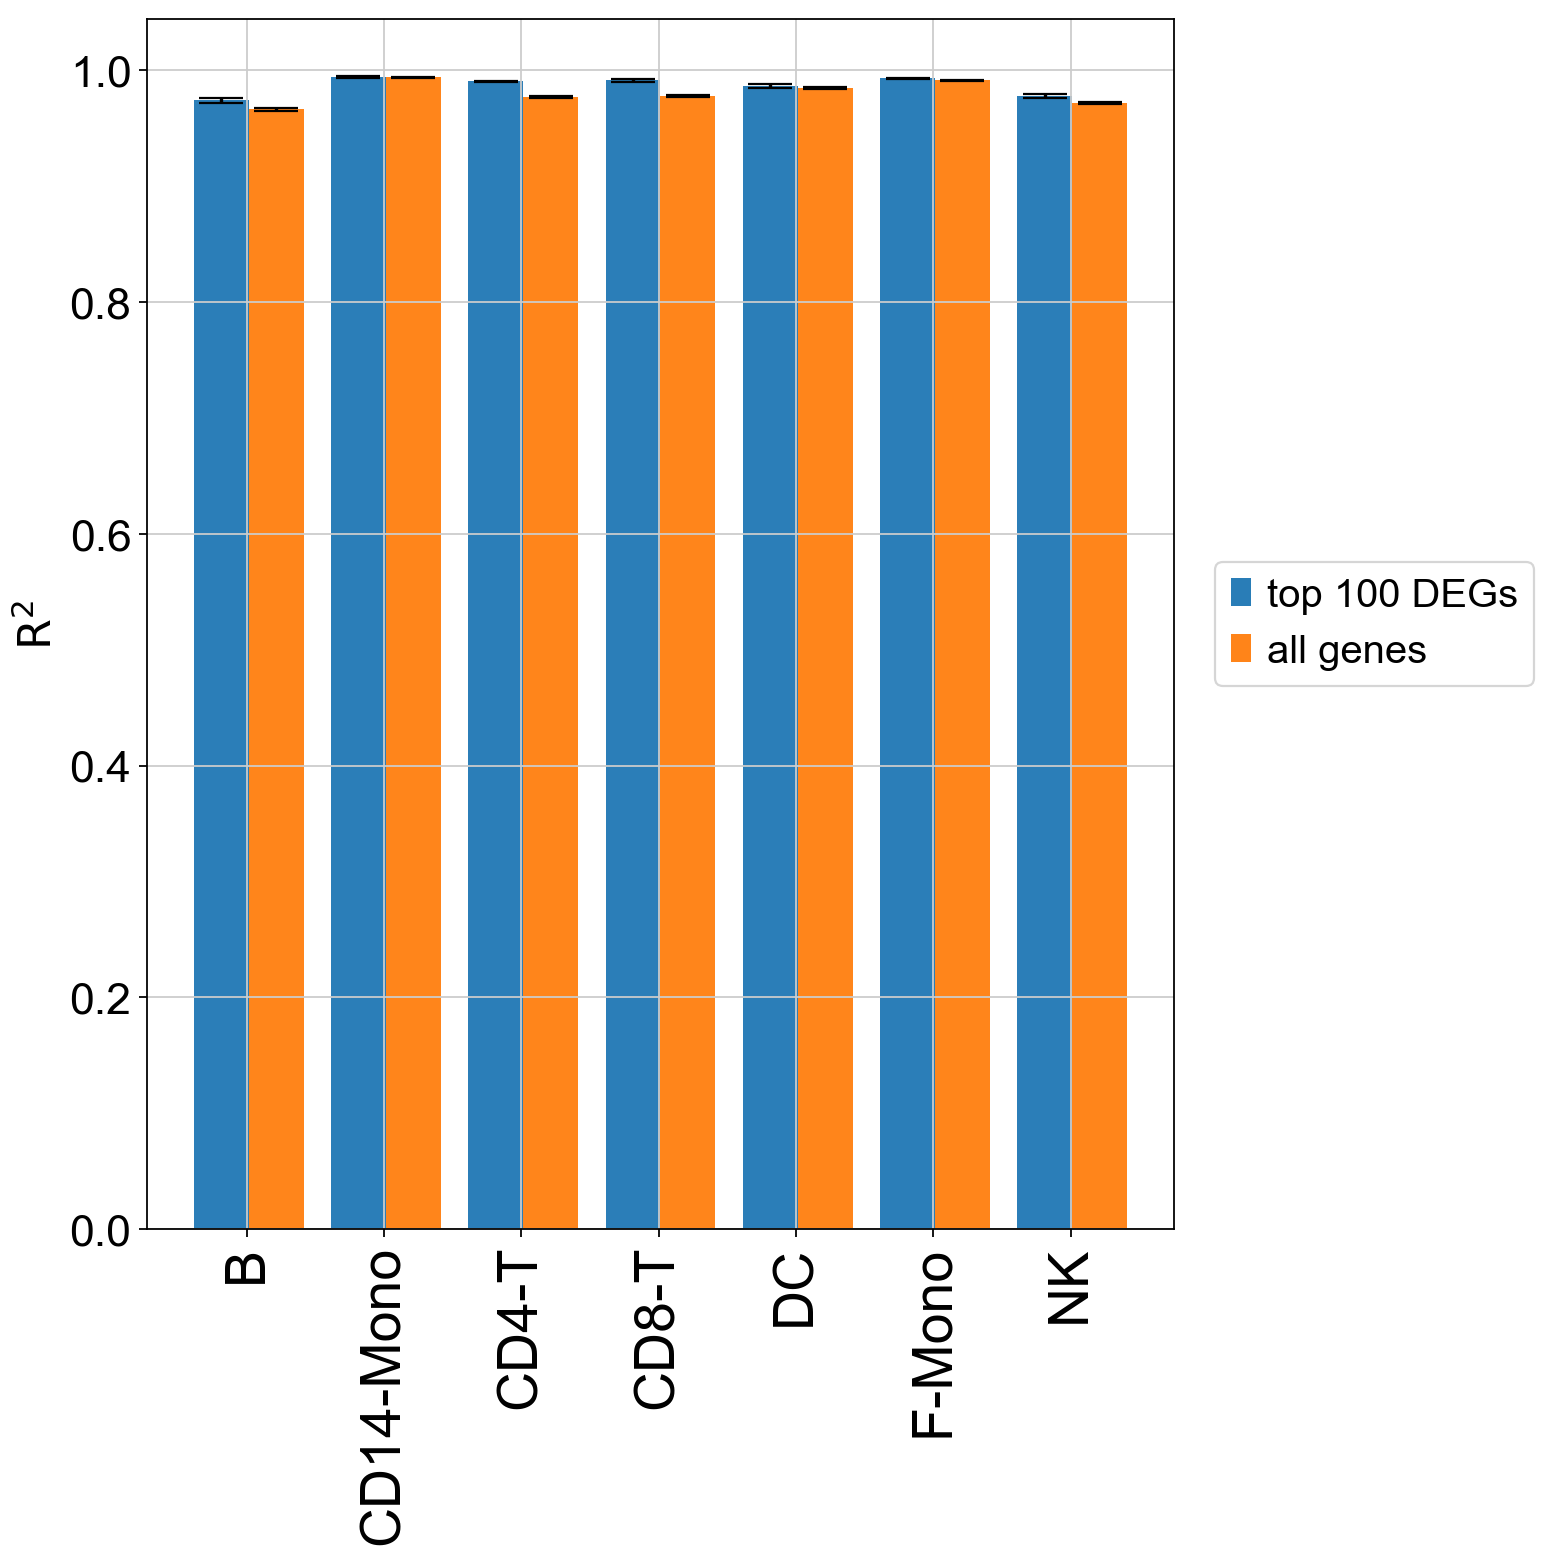

In [29]:
grouped_barplot(df, "Cell Types", "Type", "R^2 Means", "R^2 Stddevs", legend=True, filename="Fig2d_celltypes_barplots.pdf")

In [44]:
stgan_reconstructed = sc.read("../data/reconstructed/CGAN/CGAN_CD4T.h5ad")
pca_reconstructed = sc.read("../data/reconstructed/PCAVecArithm/PCA_CD4T.h5ad")
ges_reconstructed = sc.read("../data/reconstructed/Vec. Arithm./VecArithm_CD4T.h5ad")
cvae_reconstructed = sc.read("../data/reconstructed/CVAE/CVAE_CD4T.h5ad")
replace_conditions(cvae_reconstructed)

In [45]:
ctrl = cd4t_reconstructed[cd4t_reconstructed.obs["condition"] == "CD4-T_ctrl"]
real_stim = cd4t_reconstructed[cd4t_reconstructed.obs["condition"] == "CD4-T_real_stim"]
scgen_pred_stim = cd4t_reconstructed[cd4t_reconstructed.obs["condition"] == "CD4-T_pred_stim"]
stgan_pred_stim = stgan_reconstructed[stgan_reconstructed.obs["condition"] == "pred_stim"]
ges_pred_stim = ges_reconstructed[ges_reconstructed.obs["condition"] == "pred_stim"]
pca_pred_stim = pca_reconstructed[pca_reconstructed.obs["condition"] == "pred_stim"]
cvae_pred_stim = cvae_reconstructed[cvae_reconstructed.obs["condition"] == "CD4-T_pred_stim"]

In [46]:
if sparse.issparse(cvae_pred_stim.X):
    cvae_pred_stim.X = cvae_pred_stim.X.A

In [47]:
ctrl.obs["condition"] = "control"
real_stim.obs["condition"] = "stimulation real"
scgen_pred_stim.obs["condition"] = "scGen"
cvae_pred_stim.obs["condition"] = "CVAE"
stgan_pred_stim.obs["condition"] = "style transfer GAN"
ges_pred_stim.obs["condition"] = "Vec. Arithm."
pca_pred_stim.obs["condition"] = "PCA + Vec. Arithm."

In [48]:
models = ctrl.concatenate(real_stim, scgen_pred_stim, cvae_pred_stim, stgan_pred_stim, ges_pred_stim, pca_pred_stim)
models.obs["condition"].unique()

array(['control', 'stimulation real', 'scGen', 'CVAE',
       'style transfer GAN', 'Vec. Arithm.', 'PCA + Vec. Arithm.'],
      dtype=object)

In [49]:
var_temp = models.var_names.tolist()
var_temp[var_temp.index("ISG15")] = "ISG15 in CD4-T"
models.var_names = var_temp

... storing 'cell_type' as categorical
... storing 'condition' as categorical


saving figure to file ../results/Figures/Figure 2/violin_model_cmpr.pdf


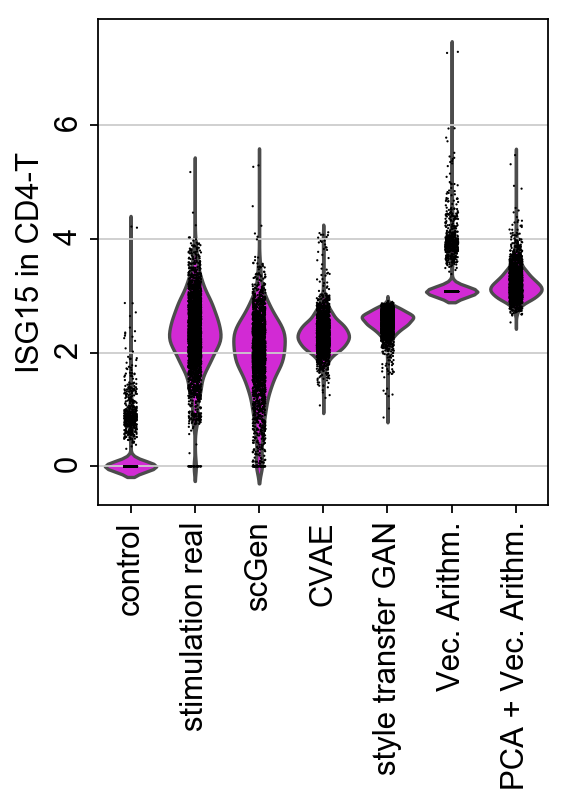

In [50]:
font = {'family' : 'Arial',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.pl.violin(models, 
             keys="ISG15 in CD4-T", 
             groupby="condition", 
             rotation=90,
             show=True,
             order=models.obs["condition"].unique().tolist(),
             color = "#ee0ef0",
             save="_model_cmpr.pdf")
os.rename(src=os.path.join(path_to_save, "violin_model_cmpr.pdf"), 
          dst=os.path.join(path_to_save, "Fig2e_model_comparison.pdf"))

In [51]:
conditions = {"real_stim": "CD4-T_real_stim", "pred_stim": "CD4-T_pred_stim"}
scgen_r2_mean, scgen_r2_var = calc_R2_specific_model(cd4t_reconstructed, n_genes=6998, conditions=conditions)
cvae_r2_mean, cvae_r2_var = calc_R2_specific_model(cvae_reconstructed, n_genes=6998, conditions=conditions)

0.9769405290644717 0.0006216715733370647
0.9127163038185713 0.0009084466327577041


In [52]:
if sparse.issparse(cvae_reconstructed.X):
    cvae_reconstructed.X = cvae_reconstructed.X.A

In [53]:
conditions = {"real_stim": "real_stim", "pred_stim": "pred_stim"}
ges_r2_mean, ges_r2_var = calc_R2_specific_model(ges_reconstructed, n_genes=6998, conditions=conditions)
pca_r2_mean, pca_r2_var = calc_R2_specific_model(pca_reconstructed, n_genes=6998, conditions=conditions)
stgan_r2_mean, stgan_r2_var = calc_R2_specific_model(stgan_reconstructed, n_genes=6998, conditions=conditions)

0.8940578766739755 0.00122718157048015
0.8989184733417208 0.0012753239677007675
0.13089161029975693 0.0006318697891882231


In [54]:
all_means = np.array([scgen_r2_mean, cvae_r2_mean, stgan_r2_mean, ges_r2_mean, pca_r2_mean])
all_vars = np.array([scgen_r2_var, cvae_r2_var, stgan_r2_var, ges_r2_var, pca_r2_var])
all_types = ["All genes"] * 5
models = ["scGen", "CVAE", "style transfer GAN", "Vec. Arithm.", "PCA + Vec. Arithm.", ]
df = pd.DataFrame({"R^2 Means": all_means, "R^2 Stddevs": all_vars, "Type": all_types, "Models": models})
df

,R^2 Means,R^2 Stddevs,Type,Models
0,0.976941,0.000622,All genes,scGen
1,0.912716,0.000908,All genes,CVAE
2,0.130892,0.000632,All genes,style transfer GAN
3,0.894058,0.001227,All genes,Vec. Arithm.
4,0.898918,0.001275,All genes,PCA + Vec. Arithm.


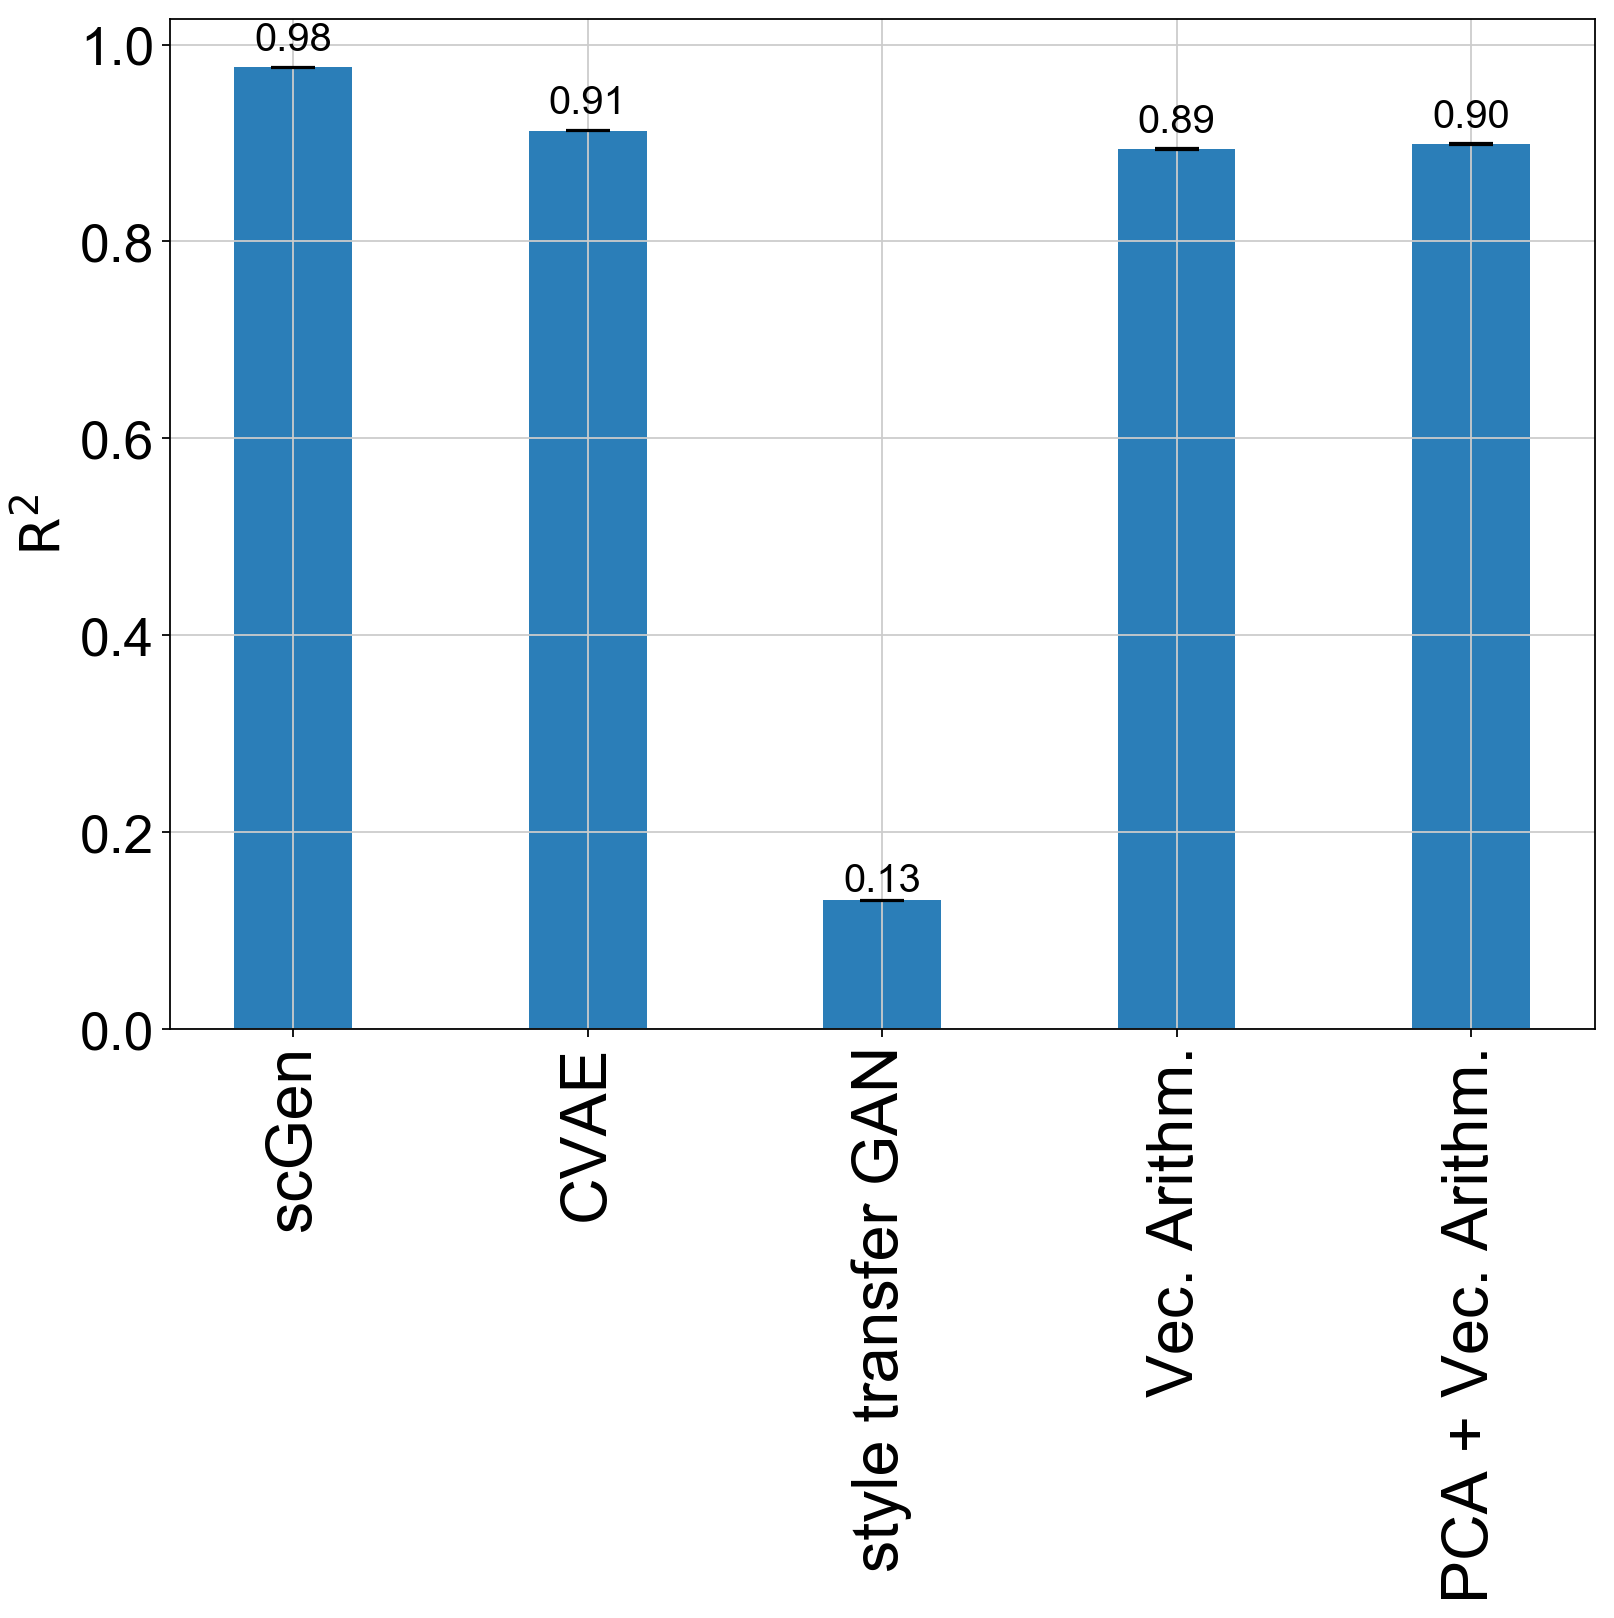

In [67]:
font = {'family' : 'Arial',
        'size'   : 2}

matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)
grouped_barplot(df, "Models", "Type", "R^2 Means", "R^2 Stddevs", put_label=True, legend=False, filename="Fig2e_models_barplots.pdf", offset=0.0)

### Fig 2.g

In [35]:
gene_list = ["CD3D", "CCL5", "GNLY", "CD79A", "FCGR3A", "S100A9", "HLA-DQA1", 
             "ISG15", "IFI6", "IFIT1", "CXCL10", "CXCL11", "APOBEC3A", "DEFB1", 
             "CCL8", "TARBP1"]
pbmc_reconstructed.obs["condition"].replace("CD14+Mono_ctrl", "CD14-Mono_ctrl", inplace=True)
pbmc_reconstructed.obs["condition"].replace("CD14+Mono_real_stim", "CD14-Mono_real_stim", inplace=True)
pbmc_reconstructed.obs["condition"].replace("CD14+Mono_pred_stim", "CD14-Mono_pred_stim", inplace=True)
pbmc_reconstructed.obs["condition"].replace("Dendritic_ctrl", "DC_ctrl", inplace=True)
pbmc_reconstructed.obs["condition"].replace("Dendritic_real_stim", "DC_real_stim", inplace=True)
pbmc_reconstructed.obs["condition"].replace("Dendritic_pred_stim", "DC_pred_stim", inplace=True)
pbmc_reconstructed.obs["condition"].replace("FCGR3A+Mono_ctrl", "F-Mono_ctrl", inplace=True)
pbmc_reconstructed.obs["condition"].replace("FCGR3A+Mono_real_stim", "F-Mono_real_stim", inplace=True)
pbmc_reconstructed.obs["condition"].replace("FCGR3A+Mono_pred_stim", "F-Mono_pred_stim", inplace=True)

saving figure to file ../results/Figures/Figure 2/dotplot.pdf


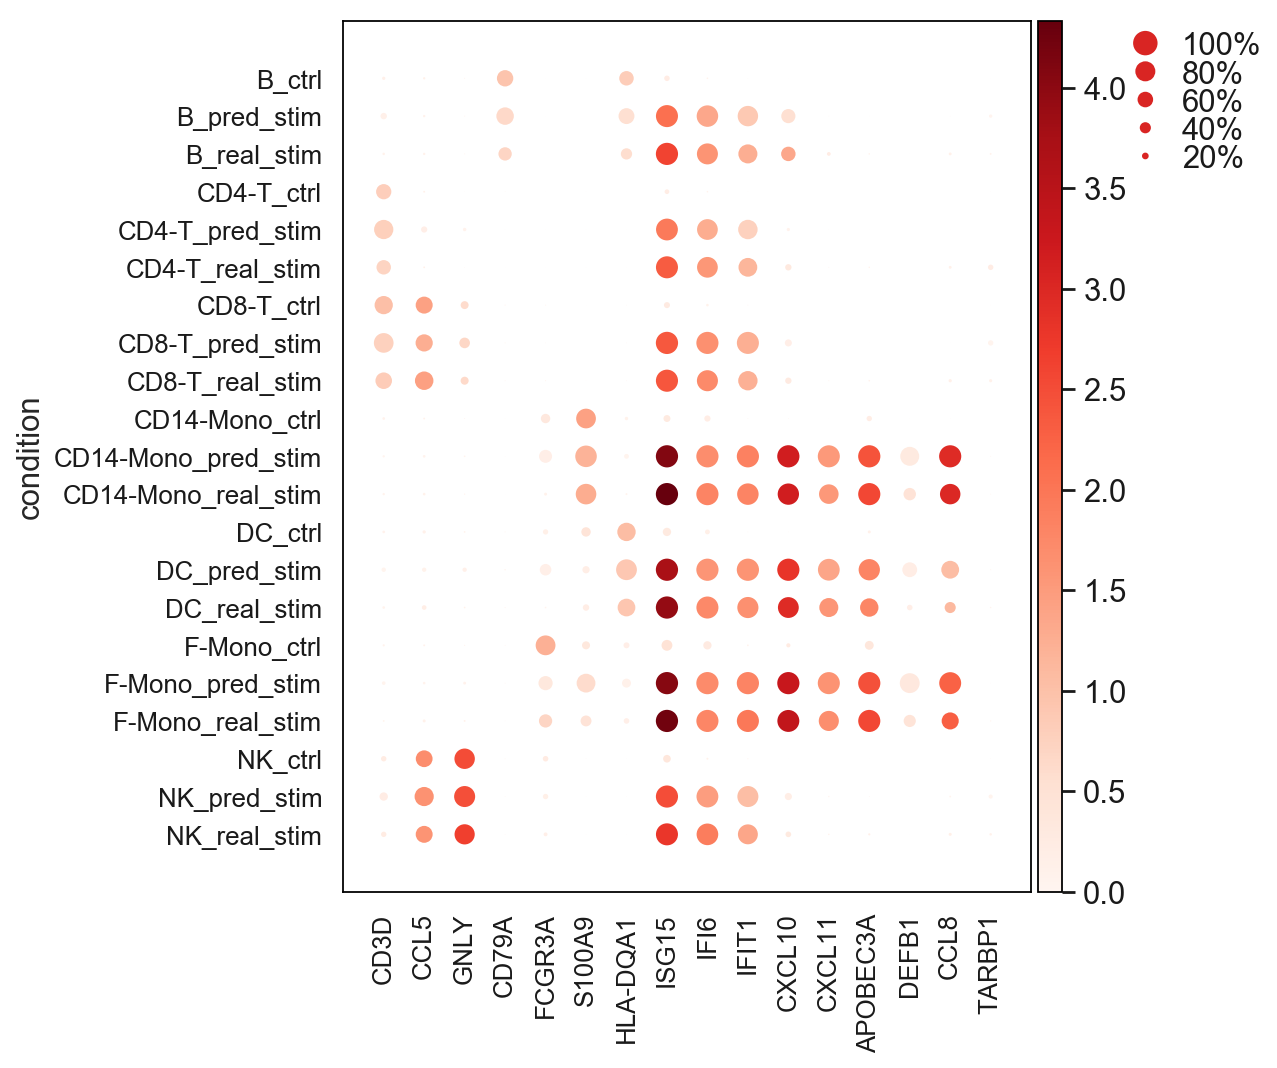

In [36]:
sc.set_figure_params(fontsize=14)
sc.pl.dotplot(pbmc_reconstructed, var_names=gene_list, groupby="condition", save=".pdf", show=True)
os.rename(src=os.path.join(path_to_save, "dotplot.pdf"), 
          dst=os.path.join(path_to_save, "Fig2g_dotplot.pdf"))